-take transformed data from csv

-Place data into a data structure (list of dicts)

-visualise the data

In [2]:
import csv

def read_csv_to_dict(file_path):
    data_dict_list = []
    with open(file_path, newline='', encoding='utf-8') as csvfile:
        csvreader = csv.reader(csvfile)
        headers = next(csvreader)  # Read the header row
        for row in csvreader:
            data_dict = dict(zip(headers, row))
            data_dict_list.append(data_dict)
    return data_dict_list

output_file = "output.csv"
data_dict_list = read_csv_to_dict(output_file)

def check_for_duplicates(data_dict_list):
    seen = set()
    duplicates = []
    for data_dict in data_dict_list:
        # Convert the dictionary to a tuple of its items, which is hashable
        data_tuple = tuple(data_dict.items())
        if data_tuple in seen:
            duplicates.append(data_dict)
        else:
            seen.add(data_tuple)
    return duplicates


output_file = "output.csv"
data_dict_list = read_csv_to_dict(output_file)
duplicates = check_for_duplicates(data_dict_list)

if duplicates:
    print("Duplicates found:")
    for duplicate in duplicates:
        print(duplicate)
else:
    print("No duplicates found.")

Duplicates found:
{'TITLE': 'Data Engineer - Python - Metadata - Remote - Outside IR35', 'SALARY': 'daily rate', 'RECRUITER': 'The Bridge (IT Recruitment) Limited', 'POSTDATE': 'Posted 21 days ago', 'HREF': 'https://www.totaljobs.com/job/data-engineer/the-bridge-it-recruitment-limited-job101932094', 'JOB_DESC': "This is a fantastic opportinity to work as a Data Engineer for a major pharmaceutical company on a remote contract, outside IR35. The key skills required for this Data Engineer role are: Python Metadata Data curation Working with 'Omics data FAIR NGS If you do have the relevant skills for this Data Engineer contract, please do apply. Contact: David Gillespie Reference: Totaljobs/4463DG Job ID: 101932094", 'SCRAPE_DATE': '19-02-2024', 'SKILLS': "{'python'}"}
{'TITLE': 'Junior Data Engineer - Crypto', 'SALARY': '[50000.0, 60000.0]', 'RECRUITER': 'Understanding Recruitment Ltd', 'POSTDATE': 'Recently', 'HREF': 'https://www.totaljobs.com/job/junior-data-engineer/understanding-recru

In [3]:
def remove_duplicates(data_list):
    unique_list = []
    seen = set()
    for data_dict in data_list:
        # Convert the dictionary to a tuple of its items for hashing
        data_tuple = tuple(data_dict.items())
        # Check if the tuple representation is already in the set
        if data_tuple not in seen:
            # If not, add it to the set and append the dictionary to the unique list
            seen.add(data_tuple)
            unique_list.append(data_dict)
    return unique_list


output_file = "output.csv"
data_dict_list = read_csv_to_dict(output_file)
unique_data_dict_list = remove_duplicates(data_dict_list)

In [4]:
for data_dict in unique_data_dict_list:
    for key, value in data_dict.items():
        print(f"{key}: {value}")
    print()  # Print an empty line between dictionaries


TITLE: Azure Data Engineer
SALARY: []
RECRUITER: Staffworx Limited
POSTDATE: Posted 19 days ago
HREF: https://www.totaljobs.com/job/data-engineer/staffworx-limited-job101943798
JOB_DESC: Azure Data Engineer for azure data engineering programme Hands on experience configuring Delta Lake on Azure Databricks Data engineering in big data Spark SQL, Databricks Delta Lake/Azure Delta Engine PySpark, Spark streaming, Scala Azure Data Factory data solutions in Azure including Azure SQL, Azure Synapse, Cosmos DB, Databricks Microsoft Certified: Azure Data Engineer Associate INSIDE IR35 - this assignment will fall within scope of IR35 legislation and appropriate umbrella company should be utilised during this assignment. This advert was posted by Staffworx Limited - a UK based recruitment consultancy supporting the global E-commerce, software & consulting sectors. Services advertised by Staffworx are those of an Agency and/or an Employment Business. Contact: James Kirk Reference: Totaljobs/swx21

In [8]:
from collections import Counter

def tally_skills(dict_list):
    skills_counter = Counter()
    for dict in dict_list:
        skills = dict.get('SKILLS', '')
        if skills:
            skills = skills.replace("'", "").replace("{", "").replace("}", "").split(", ")
            skills_counter.update(skills)
    return skills_counter

skills_tally = tally_skills(unique_data_dict_list)

print(skills_tally)


Counter({'python': 98, 'pipelines': 73, 'sql': 57, 'engineering': 55, 'quality': 52, 'analytics': 44, 'spark': 43, 'communication': 42, 'etl': 39, 'management': 37, 'aws': 36, 'programming': 35, 'architecture': 33, 'integration': 32, 'azure': 30, 'science': 30, 'integrity': 30, 'collaboration': 28, 'gcp': 26, 'c': 26, 'databricks': 25, 'java': 25, 'training': 25, 'access': 25, 'kafka': 23, 'scala': 22, 'airflow': 22, 'scalability': 22, 'transformation': 21, 'warehouse': 18, 'terraform': 17, 'bi': 17, 'analytical': 17, 'security': 17, 'git': 16, 'orchestration': 16, 'standards': 16, 'transform': 16, 'ingestion': 15, 'hadoop': 15, 'kubernetes': 15, 'reporting': 15, 'analysis': 15, 'mysql': 14, 'warehousing': 14, 'lake': 13, 'github': 13, 'nosql': 13, 'documentation': 12, 'governance': 12, 'availability': 11, 'tableau': 10, 'strategy': 10, 'pipeline': 10, 'devops': 10, 'lifecycle': 10, 'mentoring': 9, 'kubeflow': 9, 'monitoring': 9, 'validation': 9, 'postgresql': 8, 'docker': 8, 'argo': 8

Visualisation

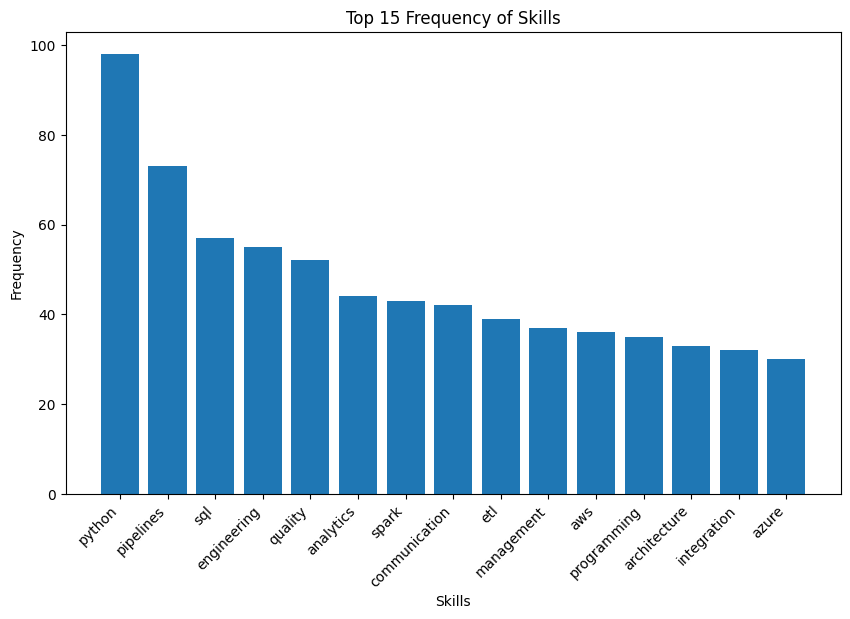

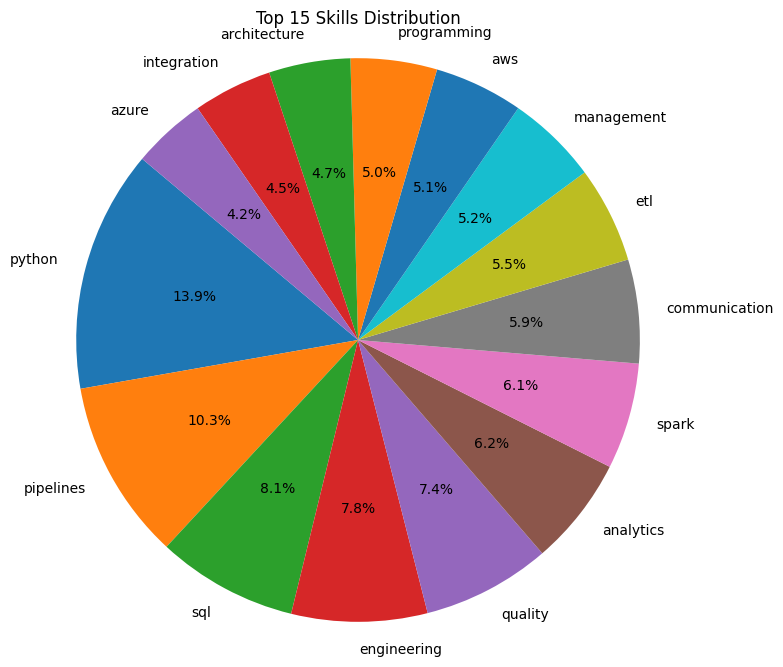

In [14]:
import matplotlib.pyplot as plt

def plot_bar_chart(counter):
    labels, values = zip(*counter.most_common(15))
    plt.figure(figsize=(10, 6))
    plt.bar(labels, values)
    plt.xlabel('Skills')
    plt.ylabel('Frequency')
    plt.title('Top 15 Frequency of Skills')
    plt.xticks(rotation=45, ha='right')
    plt.show()

def plot_pie_chart(counter):
    labels, values = zip(*counter.most_common(15))
    plt.figure(figsize=(8, 8))
    plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Top 15 Skills Distribution')
    plt.axis('equal')
    plt.show()


plot_bar_chart(skills_tally)
plot_pie_chart(skills_tally)